In [375]:
# %matplotlib inline
# import sys
# sys.modules.clear()
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, Attention, BatchNormalization
from tensorflow.keras import optimizers, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from keras.models import Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
import pprint
from datetime import datetime
import matplotlib
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import r2_score
from tensorflow.keras.regularizers import l2
from joblib import dump, load
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

# import sklearn
import math
from numpy.random import seed

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scikeras.wrappers import KerasRegressor

import warnings

# warnings.resetwarnings()
# warnings.filterwarnings('always')


# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# os.environ['CUDA_VISIBLE_DEVICES'] = '3'

seed_value = 10
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
print('pd.__version__: ',pd.__version__)
print('np.__version__: ',np.__version__)
print('keras.__version__: ',keras.__version__)
print('tf.__version__: ',tf.__version__)
print('matplotlib.__version__: ',matplotlib.__version__)

pd.__version__:  2.2.3
np.__version__:  1.26.4
keras.__version__:  3.7.0
tf.__version__:  2.18.0
matplotlib.__version__:  3.9.2


In [376]:
# !pip install --no-index pandas

In [377]:
# !pip install --no-index matplotlib

In [378]:
# !pip install --no-index scikit-learn

In [379]:
import tensorflow as tf

# Check if GPU is available

if tf.config.list_physical_devices('GPU'):
    print("GPU is available.")
else:
    print("GPU is not available.")


GPU is not available.


In [380]:
import tensorflow as tf

# Example computation
with tf.device('/GPU:0'):  # Use '/CPU:0' to force CPU
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[5.0, 6.0], [7.0, 8.0]])
    c = tf.matmul(a, b)
print(c)


tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [381]:
pwd

'C:\\Users\\msalmaniaran\\Documents\\Python Scripts - Secondary\\Reconfigurable-Antenna'

In [382]:
import os

# Define the directory you want to list
directory = 'C:/Backup - Oct 2024/Oct-2023 Backup/Users/msalmaniaran/PhD/Results-data/Reconfigurable-patch - Copy/'


# List all files and directories in the specified directory
all_files = os.listdir(directory)

# Filter out only the files
files = [f for f in all_files if os.path.isfile(os.path.join(directory, f))]

# Print the list of files
for file in files:
    print(file)

dict_files = {i: files[i] for i in range(len(files))}
print(dict_files)

AllDiode-OFF-Alpha sweep.csv
AllDiode-OFF-fx sweep.csv
AllDiode-OFF-fy sweep.csv
AllDiode-OFF-l sweep.csv
AllDiode-OFF-lextention sweep.csv
AllDiode-OFF-lh sweep.csv
AllDiode-OFF-lr sweep.csv
AllDiode-OFF-lv sweep.csv
AllDiode-OFF-offset1 sweep.csv
AllDiode-OFF-pr sweep.csv
AllDiode-OFF-pr2 sweep.csv
AllDiode-OFF-w sweep.csv
AllDiode-OFF-wr sweep.csv
AllDiode-OFF-wu sweep.csv
AllDiode-ON-Alpha sweep.csv
AllDiode-ON-fx sweep.csv
AllDiode-ON-fy sweep.csv
AllDiode-ON-l sweep.csv
AllDiode-ON-lextention sweep.csv
AllDiode-ON-lh sweep.csv
AllDiode-ON-lr sweep.csv
AllDiode-ON-lv sweep.csv
AllDiode-ON-offset1 sweep.csv
AllDiode-ON-pr sweep.csv
AllDiode-ON-pr2 sweep.csv
AllDiode-ON-w sweep.csv
AllDiode-ON-wr sweep.csv
AllDiode-ON-wu sweep.csv
lowerDiode-ON-Alpha sweep.csv
lowerDiode-ON-fx sweep.csv
lowerDiode-ON-fy sweep.csv
lowerDiode-ON-l sweep.csv
lowerDiode-ON-lextention sweep.csv
lowerDiode-ON-lh sweep.csv
lowerDiode-ON-lr sweep.csv
lowerDiode-ON-lv sweep.csv
lowerDiode-ON-offset1 sweep.cs

In [383]:
num_dfs = 14
n = 1
df = pd.DataFrame()
for i in range(num_dfs*(n-1), n*num_dfs):
    # Creating a sample DataFrame with random data
    df_new = pd.read_csv('C:/Backup - Oct 2024/Oct-2023 Backup/Users/msalmaniaran/PhD/Results-data/Reconfigurable-patch - Copy/'+str(dict_files[i])) 
    df = pd.concat([df, df_new], ignore_index=True)

# for i in range(4*num_dfs):
#     # Creating a sample DataFrame with random data
#     df_new = pd.read_csv("D:/Oct-2023 Backup/Users/msalmaniaran/PhD/Results-data/Reconfigurable-patch/"+str(dict_files[i])) 
#     df = pd.concat([df, df_new], ignore_index=True)

# Frequency Window

In [384]:
df_ys = df.drop(['alpha [mm]','fx [mm]', 'fy [mm]', 'l [mm]', 'lextension1 [mm]', 'lh [mm]', 'lr [mm]', 'lv [mm]', 'offset1 [mm]', 'pr [mm]', 'pr2 [mm]', 'w [mm]', 'wr [mm]', 'wu [mm]', 'Diode 1 state', 'Diode 2 state', 'Freq [GHz]'],axis=1)
ys_data = df_ys.values
df_yf = df.drop(['alpha [mm]','fx [mm]', 'fy [mm]', 'l [mm]', 'lextension1 [mm]', 'lh [mm]', 'lr [mm]', 'lv [mm]', 'offset1 [mm]', 'pr [mm]', 'pr2 [mm]', 'w [mm]', 'wr [mm]', 'wu [mm]', 'Diode 1 state', 'Diode 2 state', 'dB(S(1,1)) []'],axis=1)
yf_data = df_yf.values
df_y = df.drop(['alpha [mm]','fx [mm]', 'fy [mm]', 'l [mm]', 'lextension1 [mm]', 'lh [mm]', 'lr [mm]', 'lv [mm]', 'offset1 [mm]', 'pr [mm]', 'pr2 [mm]', 'w [mm]', 'wr [mm]', 'wu [mm]', 'Diode 1 state', 'Diode 2 state'],axis=1)
array = df_ys.values

a = len(df)
b = int(a/250) # 250 is the number of sampling points in a single graph of S11 parameter
reshaped_array = array.reshape(b, 250)   #250 is the number of sample points within 1-4 GHz.
df_yst = pd.DataFrame(reshaped_array)


# crob the frequency as needed
df_yst = df_yst.iloc[:, 40:-80] 
freq = df_yf.iloc[40:170].values
freq = np.squeeze(freq).tolist()
Frequency = freq

In [385]:
# freq = np.squeeze(yf_data[:len(df_yst.columns)]).tolist()
# freq = freq[40:-40]
# print(freq)

# Reload Surrogate models

In [386]:
Surrogate1 = load_model('ANN_decoder1.keras')
Surrogate2 = load_model('ANN_decoder2.keras')
Surrogate3 = load_model('ANN_decoder3.keras')
Surrogate4 = load_model('ANN_decoder4.keras')

C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages

In [387]:
x1 = np.array([-0.53543137,  0.0548655 ,  0.21073547,  0.06276533, -0.01123407,
        0.06335771,  0.02316934,  0.15493   ,  0.18526412, -0.23269195,
        0.17344425, -0.17463979,  0.12431098,  0.02725491])
x2 = np.array([ 1.15259188,  0.03169584,  0.22498164, -0.04767922, -0.02699029,
        0.16014375,  0.02720018,  0.13337159,  0.24500376, -0.18947647,
        0.18151366, -0.07039868,  0.02787709, -0.02957473])
x3 = np.array([ 0.00044023,  0.06098977,  0.19923226, -0.09232034, -0.06310218,
        0.19543453,  0.02711807,  0.07759908,  0.26911374, -0.22341645,
        0.17709264, -0.00698893,  0.04785898,  0.02822875])
x4 = np.array([ 1.89700401e-01,  7.11254240e-02,  6.21724894e-14, -3.26849658e-13,
       -3.55251967e-02,  1.55942229e-01,  4.45846614e-03,  1.64994670e-01,
        2.57905182e-01, -2.29323307e-01,  1.39949736e-01, -5.30677029e-02,
        6.49566527e-02,  3.63311905e-02])

In [424]:
scaler_y1=load('scaler_y1.bin')
scaler_y2=load('scaler_y2.bin')
scaler_y3=load('scaler_y3.bin')
scaler_y4=load('scaler_y4.bin')

In [425]:
scaler_x1=load('scaler_x1.bin')
scaler_x2=load('scaler_x2.bin')
scaler_x3=load('scaler_x3.bin')
scaler_x4=load('scaler_x4.bin')

In [426]:
x_data1 = np.load('x_data1.npy')
print(x_data1)

[[18.336       7.408      47.664      ... 56.16        4.952
   4.704     ]
 [18.4506      7.4543     47.9619     ... 56.511       4.98295
   4.7334    ]
 [18.5652      7.5006     48.2598     ... 56.862       5.0139
   4.7628    ]
 ...
 [22.53        9.1        58.56       ... 69.          6.08
   9.53846154]
 [22.53        9.1        58.56       ... 69.          6.08
   9.76923077]
 [22.53        9.1        58.56       ... 69.          6.08
  10.        ]]


In [427]:
x_data1[503]

array([22.53,  9.1 , 58.56, 26.04, 51.03,  2.7 , 25.91, 35.38, -2.8 ,
       24.41, 69.  ,  6.08, 10.  ])

In [428]:
# scaler_x1.transform([np.array([ 0.983     , 22.53      ,  9.1       , 58.56      , 26.04      ,
#        51.03      ,  2.7       , 25.91      , 35.38      , -2.8       ,
#        24.41      , 69.        ,  6.08      ,  10])])

In [429]:
x_data1_trans = scaler_x1.transform(.997*x_data1)

In [430]:
# with tf.device('/GPU:1'):  # Use '/CPU:0' to force CPU   
pr1 = Surrogate1.predict(x_data1_trans)
pr2 = Surrogate2.predict(x_data1_trans)
pr3 = Surrogate3.predict(x_data1_trans)
pr4 = Surrogate4.predict(x_data1_trans)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


394


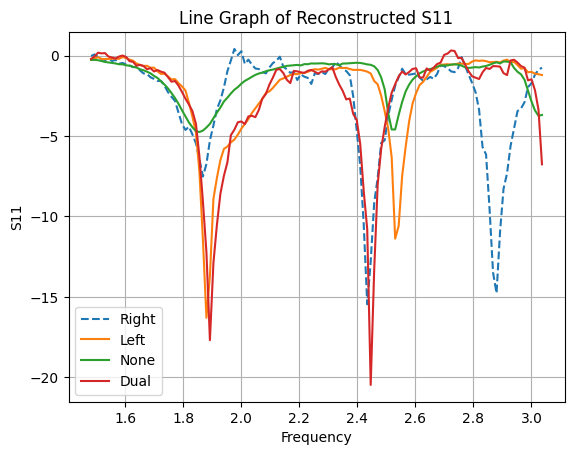

In [431]:
i = random.randint(1,len(pr1))
i = 394
print(i)
prr1 = scaler_y1.inverse_transform(pr1)
prr2 = scaler_y2.inverse_transform(pr2)
prr3 = scaler_y3.inverse_transform(pr3)
prr4 = scaler_y4.inverse_transform(pr4)
# print(np.shape(prr4[508]))
plt.plot(freq, prr1[i],'--', label = 'Right')
plt.plot(freq, prr2[i], label = 'Left')
plt.plot(freq, prr3[i], label = 'None')
plt.plot(freq, prr4[i], label = 'Dual')
plt.xlabel('Frequency')
plt.ylabel('S11')
plt.title('Line Graph of Reconstructed S11')
plt.legend()  # Show legend
plt.grid(True)
plt.show()

# Feature extraction

In [432]:
# # Function to find resonant frequencies and calculate bandwidth
# def process_prr(prr, key):
#     peaks, _ = find_peaks(-prr, height=-threshold)  # Peaks of -S11 correspond to dips in S11
#     resonant_frequencies = Frequency[peaks]  # Use your `Frequency` array
#     resonant_s11 = prr[peaks]
#     within_range = (resonant_frequencies >= min_f) & (resonant_frequencies <= max_f)
#     resonant_frequencies = resonant_frequencies[within_range]
#     resonant_s11 = resonant_s11[within_range]
#     # extr_inf[1] = np.concatenate((resonant_frequencies, resonant_s11))
#     bandwidths = []
#     for i, rf in enumerate(resonant_frequencies):
#         try:
#             # print(f"Resonant Frequency: {rf}")
            
#             # Use logical operators for filtering
#             left_mask = (0.9 * rf < Frequency) & (Frequency < rf)
#             right_mask = (1.1 * rf > Frequency) & (Frequency > rf)
    
#             # Interpolation functions for frequencies around -10 dB crossing points
#             left_part = interp1d(prr[left_mask], Frequency[left_mask], bounds_error=False, fill_value="extrapolate")
#             F1 = left_part(-10)  # Frequency on the left of rf where S11 crosses -10 dB
#             # print(f"F1: {F1}")
    
#             right_part = interp1d(prr[right_mask], Frequency[right_mask], bounds_error=False, fill_value="extrapolate")
#             F2 = right_part(-10)  # Frequency on the right of rf where S11 crosses -10 dB
#             # print(f"F2: {F2}")
    
#             # Calculate bandwidth
#             bandwidth = F2 - F1
#             bandwidths.append((rf, resonant_s11[i], bandwidth))

#         except (ValueError, IndexError):
#             # Skip if crossing points are not found
#             continue
    
#     # Store resonant frequencies, S11 values, and bandwidths in extr_inf
#     # if bandwidths:
#     extr_inf[key] = np.array(bandwidths).flatten()  # Flatten for concatenation               
    
#     # extr_inf[key] = np.concatenate((resonant_frequencies, resonant_s11))

In [433]:
from scipy.signal import find_peaks
import numpy as np
from scipy.interpolate import interp1d

def process_prr(prr, key):
    # Find peaks in the negative PRR (dips in S11)
    peaks, _ = find_peaks(-prr, height=-threshold)
    
    # Convert `Frequency` to NumPy array for indexing
    Frequency_array = np.array(Frequency)
    
    # Extract resonant frequencies and S11 values
    resonant_frequencies = Frequency_array[peaks]
    resonant_s11 = prr[peaks]
    # print('Resonant Frequencies:', resonant_frequencies)

    # Filter frequencies within the desired range
    valid_range = (resonant_frequencies >= min_f) & (resonant_frequencies <= max_f)
    resonant_frequencies = resonant_frequencies[valid_range]
    resonant_s11 = resonant_s11[valid_range]

    bandwidths = []

    for i, rf in enumerate(resonant_frequencies):
        try:
            # Define the frequency window for search
            lower_bound = 0.96 * rf
            upper_bound = 1.04 * rf

            # Create a mask for the limited frequency window
            window_mask = (Frequency_array >= lower_bound) & (Frequency_array <= upper_bound)

            # Get the data within the window
            freq_window = Frequency_array[window_mask]
            prr_window = prr[window_mask]

            # Find the crossing points around -10 dB
            F1, F2 = None, None
            
            for j in range(len(prr_window) - 1):
                # Check for crossings near -10 dB
                if prr_window[j] > -10 and prr_window[j + 1] <= -10:
                    # Linear interpolation for F1
                    F1 = freq_window[j] + (freq_window[j + 1] - freq_window[j]) * (-10 - prr_window[j]) / (prr_window[j + 1] - prr_window[j])
                elif prr_window[j] < -10 and prr_window[j + 1] >= -10:
                    # Linear interpolation for F2
                    F2 = freq_window[j] + (freq_window[j + 1] - freq_window[j]) * (-10 - prr_window[j]) / (prr_window[j + 1] - prr_window[j])

            # Calculate bandwidth only if both crossings are valid
            if F1 is not None and F2 is not None:
                bandwidth = F2 - F1
                bandwidths.append((rf, resonant_s11[i], bandwidth))
                # print(f"Resonant Frequency: {rf}, F1: {F1}, F2: {F2}, Bandwidth: {bandwidth}")
            else:
                continue
                # print(f"Bandwidth could not be determined for resonant frequency {rf}, {key}")

        except Exception as e:
            # Handle unexpected errors gracefully
            print(f"Error processing resonant frequency {rf}: {e}")
            continue

    # Store results in extr_inf
    extr_inf[key] = np.array(bandwidths).reshape(-1, 3) if bandwidths else np.array([])


In [434]:
threshold = -10  # Example threshold; adjust as needed
min_f = 1.85
max_f = 2.5
extr_inf = {}
def big_model(data):
    # extr_inf = {}
    # threshold = -10  # Example threshold; adjust as needed
    # min_f = 1.85
    # max_f = 2.5
    # data_trs = scaler_x1.transform(data.reshape(1,-1))
    data_trs = data
    extr_inf.clear()  # Reset after every prediction if needed
    # print("Data shape for Surrogate1:", data_trs.shape)
    # with tf.device('/GPU:1'):
    pr1 = Surrogate1.predict(data_trs)
    pr2 = Surrogate2.predict(data_trs)
    pr3 = Surrogate3.predict(data_trs)
    pr4 = Surrogate4.predict(data_trs)

    prr1 = np.squeeze(scaler_y1.inverse_transform(pr1))
    prr2 = np.squeeze(scaler_y2.inverse_transform(pr2))
    prr3 = np.squeeze(scaler_y3.inverse_transform(pr3))
    prr4 = np.squeeze(scaler_y4.inverse_transform(pr4))

    process_prr(prr1, 1)
    process_prr(prr2, 2)
    process_prr(prr3, 3)
    process_prr(prr4, 4)

#     plt.plot(freq, prr1,'--', label = 'Right')
#     plt.plot(freq, prr2, label = 'Left')
#     plt.plot(freq, prr3, label = 'None')
#     plt.plot(freq, prr4, label = 'Dual')
#     plt.xlabel('Frequency')
#     plt.ylabel('S11')
#     plt.title('Line Graph of Reconstructed and Actual S11')
#     plt.legend()  # Show legend
#     plt.grid(True)
#     plt.show()


    return extr_inf

In [435]:
x_data1[394]

array([22.53      ,  9.1       , 58.56      , 26.04      , 51.03      ,
        2.7       , 25.91      , 35.38      , -2.8       , 23.94871795,
       69.        ,  6.08      ,  5.78      ])

In [436]:
# ab =  [1.15666647, 29.09164395,7.21767381,68.9956505 ,25.08535916, 36.70777354,
#   1.83798008, 22.80516019, 18.00688073, -3.17394591, 25.5074841,  77.54383241,
#   8.63545438,  2.36937321]

In [437]:
# big_model(np.array(ab))
# big_model(x_data1[508])


In [438]:
a = scaler_x1.transform([x_data1[394]])
print(a)

[[ 0.01987417  0.198154   -0.0198154  -0.0320067   0.01610405  0.05185217
   0.13362442  0.15055952 -0.39383351 -0.28568549 -0.12025187  0.07421394
   0.01415108]]


In [439]:
# a = big_model(x_data1[508])
x = big_model(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [440]:
print(x)

{1: array([[  2.43373494, -18.83282471,   0.03913758]]), 2: array([[  1.87951807, -15.92254734,   0.0387442 ]]), 3: array([], dtype=float64), 4: array([[  1.89156627, -21.3922863 ,   0.03461724],
       [  2.43373494, -19.07114983,   0.03968869]])}


# RL envorinment

In [441]:
type(x[4][0][0])==np.float64

True

## Environment Hyperparameters

In [442]:
# alpha_low = 0.8
# fx_low = 10
# fy_low = 0
# l_low = 50
# lextension_low = 15
# lh_low = 5
# lr_low = 0.1
# lv_low = 1
# offset1_low = 15
# pr_low = -3.3
# pr2_low = 18
# w_low = 60
# wr_low = 1
# wu_low = 1

# alpha_high = 1
# fx_high = 40
# fy_high = 10
# l_high = 70
# lextension_high = 40
# lh_high = 55
# lr_high = 5
# lv_high = 40
# offset1_high = 40
# pr_high = 3.3
# pr2_high = 26
# w_high = 80
# wr_high = 10
# wu_high = 10

In [443]:
# alpha_low = 0.9
# fx_low = 15
# fy_low = 6
# l_low = 50
# lextension_low = 20
# lh_low = 45
# lr_low = 1
# lv_low = 20
# offset1_low = 30
# pr_low = -3.3
# pr2_low = 20
# w_low = 60
# wr_low = 4
# wu_low = 4

# alpha_high = 1
# fx_high = 24
# fy_high = 9.5
# l_high = 60
# lextension_high = 28
# lh_high = 53
# lr_high = 2.8
# lv_high = 27
# offset1_high = 36
# pr_high = -2.7
# pr2_high = 25
# w_high = 70
# wr_high = 7
# wu_high = 7

In [462]:
################################## Environment ###########################################
fx_low = 20
fy_low = 8.5
l_low = 55
lextension_low = 25
lh_low = 50
lr_low = 2.5
lv_low = 25
offset1_low = 34
pr_low = -3
pr2_low = 23
w_low = 68
wr_low = 5.5
wu_low = 5

fx_high = 24
fy_high = 9.5
l_high = 60
lextension_high = 28
lh_high = 53
lr_high = 2.8
lv_high = 27
offset1_high = 36
pr_high = -2.7
pr2_high = 25
w_high = 70
wr_high = 7
wu_high = 7

In [463]:
Hidden_Neurons = 256
buffer_capacity = 5000
batch_size = 256

intended_frequency = np.array([1.9, 2.45])           #  [GHz]
max_reward = 0
relative_frequency_tolerance = 0.02

num_states = 13
num_actions = 13

upper_bound_state = np.array([fx_high, fy_high,
                             l_high, lextension_high, lh_high,
                             lr_high, lv_high, offset1_high,
                             pr_high, pr2_high, w_high, wr_high, wu_high])

lower_bound_state = np.array([fx_low, fy_low,
                             l_low, lextension_low, lh_low,
                             lr_low, lv_low, offset1_low,
                             pr_low, pr2_low, w_low, wr_low, wu_low])



# data = [upper_bound_state, lower_bound_state]

# min_max_scaler = preprocessing.MinMaxScaler()
# data_minmax = min_max_scaler.fit_transform(data)

step_action_ = 1
upper_bound_act = []
lower_bound_act = []
for i in range(num_actions):
    upper_bound_act.append((upper_bound_state[i]-lower_bound_state[i])/2)
    
lower_bound_act = [-x for x in upper_bound_act]
    
    
# for i in range(num_actions):
#     upper_bound_act.append(step_action_/25)
#     lower_bound_act.append(-step_action_/25)

upper_bound_action = np.array(upper_bound_act)
lower_bound_action = np.array(lower_bound_act)   

# upper_bound_action = np.array([+step_action_/25, +0.1, +0.1])
# lower_bound_action = np.array([-0.1, -0.1, -0.1])

lower_bound_state_scaled = scaler_x1.transform([lower_bound_state])
upper_bound_state_scaled = scaler_x1.transform([upper_bound_state])

In [464]:
# print(upper_bound_state_scaled)
# print(lower_bound_state_scaled)
# print(upper_bound_act)
# print(lower_bound_act)

In [465]:
np.round(np.array([1.2155,2.5494]), 2)

array([1.22, 2.55])

In [467]:
class env_hfss:
    def __init__(self, data):
        # Initialize environment parameters
        self.center_frequency = intended_frequency
        self.bandwidth = [0.034, 0.034]
        self.s11_threshold = -10
        self.reward = 0
        self.done = True  # Indicates if target has been reached
        self.designs_scores = {}
        self.objectives_scores = {}
        self.outputs = {}
        
        # Design parameters extracted from input data
        (self.fx, self.fy, self.l, self.lextension, 
         self.lh, self.lr, self.lv, self.offset1, self.pr, 
         self.pr2, self.w, self.wr, self.wu) = data

        # Initial state
        self.state = data
        print("Initial state: ", self.state)

        # Define state and action space boundaries
        self.state_low = lower_bound_state_scaled
        self.state_high = upper_bound_state_scaled
        self.action_low = lower_bound_action
        self.action_high = upper_bound_action

    def step(self, action):
        # Clip and apply the action to the current state
        clipped_action = np.clip(np.squeeze(action), self.action_low, self.action_high)
#         new_state = np.round(np.squeeze(self.state) + clipped_action, 3)
        new_state = np.squeeze(self.state) + clipped_action
        print('new_state:',new_state)
        new_state = new_state.reshape(1,-1)
        # Ensure the new state remains within valid bounds
        if not self._is_valid_state(new_state):
            new_state = np.clip(new_state, self.state_low, self.state_high)

        if np.array_equal(new_state, self.state):
            self.reward = -5  # No state change penalty
            self.done = False
            return self.state, self.reward, self.done
        else:
            self.state = new_state
            # print(self.state)
            self.outputs = big_model(self.state)
#             print(self.outputs)
            self.reward, self.done = self._check_objective()
            return self.state, self.reward, self.done

    def _is_valid_state(self, state):
        return np.all(self.state_low <= state) and np.all(state <= self.state_high)

    def _check_objective(self):
        reward_threshold = -0.40
        
        # Band checks
        right_band_check = len(np.squeeze(self.outputs[1])) == 3 and type(np.squeeze(self.outputs[1])[0])==np.float64

        left_band_check = len(np.squeeze(self.outputs[2])) == 3 and type(np.squeeze(self.outputs[2])[0])==np.float64
        none_band_check = len(self.outputs[3]) == 0
        dual_band_check = len(self.outputs[4]) == 2
        
        # Evaluate each band based on intended frequencies
        fitness_score_right = self._evaluate_band(right_band_check, self.outputs[1], intended_frequency[1])
        fitness_score_left = self._evaluate_band(left_band_check, self.outputs[2], intended_frequency[0])
        fitness_score_none = 1 if none_band_check else 0
        fitness_score_dual1, fitness_score_dual2 = self._evaluate_dual_band(dual_band_check)
        
#         print(fitness_score_right)
#         print(fitness_score_left)
#         print(fitness_score_none)
#         print(fitness_score_dual1)
#         print(fitness_score_dual2)
        
        # Calculate the overall reward
        self.reward = float((fitness_score_right + fitness_score_left + fitness_score_none + fitness_score_dual1 + fitness_score_dual2) / 5 - 1)
#         print('self.reward:', self.reward)
        self.done = self.reward > reward_threshold

        
        if self.done:
            self.designs_scores[tuple(self.state.flatten())] = self.reward
        return self.reward, self.done

    def _evaluate_band(self, band_check, output, frequency):
        if band_check:
            # print(output[0])
            # output_value0  = np.squeeze(output)
            if math.isclose(np.squeeze(output)[0], frequency, rel_tol=relative_frequency_tolerance):
                if np.squeeze(output)[2]<0.07:
                    self.s11 = np.squeeze(output)[1]
                    self.bandwidth = np.squeeze(output)[2]
                    # print(self._calculate_fitness())
                    return self._calculate_fitness()
                else:
#                     print("BW too big!")
                    return 0
            else:
#                 print(f"Band centered at {frequency} is out of range.")
                return 0
        else:
#             print(f"Band for frequency {frequency} does not fit.")
            return 0


    def _evaluate_dual_band(self, dual_band_check):
        if dual_band_check:
            output_value_1 = self.outputs[4][0]
            output_value_2 = self.outputs[4][1]
            if (math.isclose(output_value_1[0], intended_frequency[0], rel_tol=relative_frequency_tolerance) and
                math.isclose(output_value_2[0], intended_frequency[1], rel_tol=relative_frequency_tolerance)):

                if (output_value_1[2]<0.07 and output_value_2[2]<0.07):
                    self.s11, self.bandwidth = output_value_1[1], output_value_1[2]
                    fitness_score_dual1 = self._calculate_fitness()

                    self.s11, self.bandwidth = output_value_2[1], output_value_2[2]
                    fitness_score_dual2 = self._calculate_fitness()

                    return fitness_score_dual1, fitness_score_dual2
                else:
                    return 0, 0
            else:
                # print("Dual bands are out of range.")
                return 0, 0
        else:
            # print("Dual band configuration does not fit.")
            return 0, 0

    def _calculate_fitness(self):
        s11_min, s11_max = -40, 0
        bandwidth_min, bandwidth_max = 0, 0.07  # GHz
        weights = [0.5, 0.5]
        
        normalized_s11 = (s11_max - self.s11) / (s11_max - s11_min)
        normalized_bandwidth = (self.bandwidth - bandwidth_min) / (bandwidth_max - bandwidth_min)
        
        return weights[0] * normalized_s11 + weights[1] * normalized_bandwidth

    def reset(self):
        self.state = np.array([random.uniform(*bounds) for bounds in [
            (fx_low, fx_high), (fy_low, fy_high), 
            (l_low, l_high), (lextension_low, lextension_high), (lh_low, lh_high),
            (lr_low, lr_high), (lv_low, lv_high), (offset1_low, offset1_high), 
            (pr_low, pr_high), (pr2_low, pr2_high), (w_low, w_high), 
            (wr_low, wr_high), (wu_low, wu_high)
        ]])
        return scaler_x1.transform([self.state])
    
#     def reset(self):
#         self.state = x_data1[508]
#         return scaler_x1.transform([self.state])
    
    
    def final_validation(self):
        if right_band_check and left_band_check and none_band_check and dual_band_check:
            return 'valid'
        else:
            return 'non-valid'
    def get_scores(self):
        return self.designs_scores


## Ornstein-Uhlenbeck noise process

In [468]:
# Define an Ornstein-Uhlenbeck noise process
class OUActionNoise:
    def __init__(self, mean, std_deviation, decay, theta=0.5, dt=1e-0, x_initial=None):
        self.theta = theta
        self.mean = mean
        self.std_dev = std_deviation
        self.dt = dt
        self.decay = decay
        self.alpha = 1
        self.x_initial = x_initial
        self.reset()
        self._counter = 0

    def __call__(self):
        # Formula taken from https://www.wikipedia.org/wiki/Ornstein-Uhlenbeck_process.
        x = self.alpha * (
                self.x_prev
                + self.theta * (self.mean - self.x_prev) * self.dt
                + self.std_dev * np.sqrt(self.dt) * np.random.normal(size=self.mean.shape)
        )
        # Store x into x_prev
        # Makes next noise dependent on current one
        self.x_prev = x
        self.alpha = math.exp(self.decay * -self._counter)
        self._counter += 1
        return x

    def reset(self):
        if self.x_initial is not None:
            self.x_prev = self.x_initial
        else:
            self.x_prev = np.zeros_like(self.mean)


# Define a replay buffer to store experiences
class Buffer:
    def __init__(self, buffer_capacity = buffer_capacity, batch_size = batch_size):
        # Number of "experiences" to store at max
        self.buffer_capacity = buffer_capacity
        # Num of tuples to train on.
        self.batch_size = batch_size
        self.buffer_counter = 0

        # Instead of list of tuples as the exp.replay concept go
        # We use different np.arrays for each tuple element
        self.state_buffer = np.zeros((self.buffer_capacity, num_states))
        self.action_buffer = np.zeros((self.buffer_capacity, num_actions))
        self.reward_buffer = np.zeros((self.buffer_capacity, 1))
        self.next_state_buffer = np.zeros((self.buffer_capacity, num_states))

    # Takes (s,a,r,s') observation tuple as input
    def record(self, obs_tuple):
        # Set index to zero if buffer_capacity is exceeded,
        # replacing old records
        index = self.buffer_counter % self.buffer_capacity
        self.state_buffer[index] = np.squeeze(obs_tuple[0])
        self.action_buffer[index] = np.squeeze(obs_tuple[1])
        self.reward_buffer[index] = np.squeeze(obs_tuple[2])
        self.next_state_buffer[index] = np.squeeze(obs_tuple[3])

        self.buffer_counter += 1
        # print(self.buffer_counter)
    @tf.function
    def update(
        self, state_batch, action_batch, reward_batch, next_state_batch,
    ):


        with tf.GradientTape() as tape:
            target_actions = target_actor(next_state_batch, training=True)
            # tf.print("target_actions: ", target_actions)
            y = reward_batch + gamma * target_critic(
                [next_state_batch, target_actions], training=True
            )
            # tf.print("y: ", y)
            critic_value = critic_model([state_batch, action_batch], training=True)
            # tf.print("critic_value: ", critic_value)
            critic_loss = tf.math.reduce_mean(tf.math.square(y - critic_value))
            # tf.print("critic_loss: ", critic_loss)

        critic_grad = tape.gradient(critic_loss, critic_model.trainable_variables)
        critic_optimizer.apply_gradients(
            zip(critic_grad, critic_model.trainable_variables)
        )

        with tf.GradientTape() as tape:
            actions = actor_model(state_batch, training=True)
            # tf.print("actions: ", actions)
            critic_value = critic_model([state_batch, actions], training=True)
            # tf.print("critic_value: ", critic_value)
            actor_loss = -tf.math.reduce_mean(critic_value)

        actor_grad = tape.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(
            zip(actor_grad, actor_model.trainable_variables)
        )

    # We compute the loss and update parameters
    def learn(self):
        # Get sampling range
        record_range = min(self.buffer_counter, self.buffer_capacity)
        # Randomly sample indices
        batch_indices = np.random.choice(record_range, self.batch_size)
        
        # print('self.state_buffer[batch_indices]:',self.state_buffer[batch_indices])
        # print('self.reward_buffer[batch_indices]:',self.reward_buffer[batch_indices])
        
        # Convert to tensors
        state_batch = tf.convert_to_tensor(self.state_buffer[batch_indices])
        action_batch = tf.convert_to_tensor(self.action_buffer[batch_indices])
        reward_batch = tf.convert_to_tensor(self.reward_buffer[batch_indices])
        reward_batch = tf.cast(reward_batch, dtype=tf.float32)
        next_state_batch = tf.convert_to_tensor(self.next_state_buffer[batch_indices])

        self.update(state_batch, action_batch, reward_batch, next_state_batch)




# This update target parameters slowly based on rate `tau`, which is much less than one.
@tf.function
def update_target(target_weights, weights, tau):
    for target_weight, weight in zip(target_weights, weights):
        target_weight.assign(tau * weight + (1 - tau) * target_weight)

# # Setup Multi-GPU Strategy
# strategy = tf.distribute.MirroredStrategy()

# print('Number of devices: {}'.format(strategy.num_replicas_in_sync))


def get_actor():
    # with strategy.scope():
    # Initialize weights between -3e-3 and 3-e3
    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)

    inputs = layers.Input(shape=(num_states,))
    out = layers.Dense(Hidden_Neurons, activation="relu")(inputs)               # use sigmoid function for hidden layers instead relu >>> Stuck in local extermum
#     drop = keras.layers.Dropout(0.4)(out) #remove the drop-out layer
#     out = layers.Dense(Hidden_Neurons*2, activation="sigmoid")(out)
    out = layers.Dense(2*Hidden_Neurons, activation="relu")(out)
    out = layers.Dense(2*Hidden_Neurons, activation="relu")(out)
    out = layers.Dense(Hidden_Neurons, activation="relu")(out)

#     outputs = layers.Dense(num_actions, kernel_initializer=last_init)(out)
    outputs = layers.Dense(num_actions, activation="tanh", kernel_initializer=last_init)(out) #no activation function is needed.
    outputs = outputs * tf.convert_to_tensor(upper_bound_action.astype(np.float32))
    model = tf.keras.Model(inputs, outputs)
    return model


def get_critic():
    # with strategy.scope():
# State as input
    state_input = layers.Input(shape=(num_states,))
    state_out = layers.Dense(Hidden_Neurons, activation="relu")(state_input)
#     state_out = layers.Dense(Hidden_Neurons*2, activation="sigmoid")(state_out)
#     drop = keras.layers.Dropout(0.4)(state_out)
    state_out = layers.Dense(Hidden_Neurons, activation="relu")(state_out)


    # Action as input
    action_input = layers.Input(shape=(num_actions,))
    action_out = layers.Dense(Hidden_Neurons, activation="relu")(action_input)

    # Both are passed through separate layer before concatenating
    concat = layers.Concatenate()([state_out, action_out])

    out = layers.Dense(Hidden_Neurons, activation="relu")(concat)
#     out = layers.Dense(Hidden_Neurons, activation="sigmoid")(out)
    out = layers.Dense(Hidden_Neurons, activation="relu")(out)
    out = layers.Dense(Hidden_Neurons, activation="relu")(out)
    outputs = layers.Dense(1)(out)

    # Outputs single value for give state-action
    model = tf.keras.Model([state_input, action_input], outputs)

    return model


# @tf.function
def policy(state, noise_object):
    sampled_actions = tf.squeeze(actor_model(state))
    noise = noise_object()
    # Adding noise to action
    sampled_actions = sampled_actions.numpy() + noise

    # We make sure action is within bounds
    legal_action = np.clip(sampled_actions, lower_bound_action, upper_bound_action)

    return [np.squeeze(legal_action)]


## Execution Hyperparameters

In [469]:
std_dev = 0.01  #  Standard deviation
decay = 0.2e-2

ou_noise = OUActionNoise(mean=np.zeros(num_actions), std_deviation=float(std_dev) * np.ones(num_actions), decay=decay)
# print("ou_noise: ", ou_noise)
actor_model = get_actor()
critic_model = get_critic()

target_actor = get_actor()
target_critic = get_critic()

# Making the weights equal initially
target_actor.set_weights(actor_model.get_weights())
target_critic.set_weights(critic_model.get_weights())

# Learning rate for actor-critic models
critic_lr = 0.003
actor_lr = 0.001

critic_optimizer = tf.keras.optimizers.Adam(critic_lr)
actor_optimizer = tf.keras.optimizers.Adam(actor_lr)

max_timesteps_episode = 30
total_episodes = 300
# Discount factor for future rewards
gamma = 0.99
# Used to update target networks
tau = 0.003

buffer = Buffer(buffer_capacity, batch_size)
learn_freq = 1
target_update_freq = 1

learn_counter = 0
target_update_counter = 0
timestep_counter = 0

# To store reward history of each episode
ep_reward_list = []
# To store average reward history of last few episodes
avg_reward_list = []


## Code Execution

Using GPU:  []
Current Time - New test episode is just started = 08:51:10
Reset state: [[-0.20655737  0.3634531  -0.99606486  0.73448982 -0.20018505 -0.2054534
   0.37395053  0.20033768 -0.39384808 -0.21678604 -0.34706597 -0.73137396
  -0.46377462]]
time step:  6678
new_state: [22.19852417  9.79125859 55.71107609 26.56740782 51.46264538  2.73054205
 25.84732786 35.39022409 -3.01975414 23.60672258 68.39940392  5.0209316
  5.26969537]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6679
new_state: [ 1.9816939   0.4980668  -0.12480749  0.09620753  1.99742011  0.42903114
 -0.49869871  1.30704269 -0.5438746  -0.40485878 -0.80512978  0.73366404
  0.53440624]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
reward: -0.3689703033223838
state: [[24.          9.41246199 58.44050155 26.23323081 53.          2.8
  25.         36.         -3.         23.77632667 68.          6.53280656
   6.20301564]]
Learning process is done....
Updating the target networks is done....
Episode * 4 * Reward is ==> -1.0689091186024207
designs_fitness_scores: {}
Using GPU:  []
Current Time - New test episode is just started = 08:51:14
Reset state: [[-1.11745046 -0.08520832  0.26051832  0.57619995 -0.0594427  -0.17091555
   0.3889927   0.24902706 -0.39385565 -0.01787881 -0.29994216  1.17777667
  -0.32766659]]
time step:  6688
new_state: [21.36177356  9.17269468 59.06217118 26.00652841 51.84815317  2.61802257
 25.75894314 36.40982738 -3.05038049 24.68439593 68.73207966  7.37518396
  5.41062505]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
reward: -0.6999388152800369
state:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
reward: -0.5611394207297886
state: [[24.          9.5        60.         25.26508581 53.          2.8
  25.         36.         -3.         23.84978917 68.          5.5
   5.        ]]
Learning process is done....
Updating the target networks is done....
time step:  6699
new_state: [ 1.06242673  0.66500509  0.47445454 -0.51148854  1.36206166  0.35487436
 -0.79550907  0.73304287 -0.53468592 -0.41332178 -0.54094452 -1.05307471
 -1.24808497]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
reward: -0.5629449601062406
state: [[24.         9.5       60.        25.2441827 53.         2.8
  25.        36.        -3.        23.7691607 68.         5.5
   5.       ]]
Learning process is done....
Updating the target networks is done....
time step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
reward: -0.5695034413573471
state: [[24.          9.5        60.         25.01105272 53.          2.8
  25.         36.         -3.         23.64838966 68.          5.5
   5.        ]]
Learning process is done....
Updating the target networks is done....
time step:  6710
new_state: [ 1.01606653  0.57182906  0.60525868 -0.65903346  1.29648313  0.33173992
 -0.76240588  0.78089408 -0.53057738 -0.4923905  -0.63439867 -1.0182081
 -1.32494641]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
reward: -0.5697544935314931
state: [[24.          9.5        60.         25.         53.          2.8
  25.         36.         -3.         23.65792774 68.          5.5
   5.        ]]
Learning process is done....
Updating the target networks is done....
time step:  6711
new_state: [ 1.0100878   0.56645852  0.6092723  -0.6578119

Learning process is done....
Updating the target networks is done....
time step:  6721
The timesteps per episode reached the max.....
Episode * 6 * Reward is ==> -17.86315991713913
designs_fitness_scores: {}
Using GPU:  []
Current Time - New test episode is just started = 08:51:28
Reset state: [[-0.64480634  0.4104769  -0.12487658 -0.63421584  0.4428879   0.09222381
   0.23357137 -0.09201864 -0.3938346   0.11109177  0.12772582 -0.67501138
  -0.49319632]]
time step:  6722
new_state: [21.8437008   9.7815429  58.08313845 24.69887397 53.6641423   2.75702492
 25.38334275 34.92193142 -2.93934411 24.68003279 69.97324246  5.75171956
  4.92254845]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6723
new_state:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6733
new_state: [ 2.0441933   0.06151201  0.06987446 -0.16270455  2.00209913  0.42812606
 -0.49432707  1.30902935 -0.5438747  -0.17262226 -0.84447566  0.69410776
  0.52248639]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
reward: -0.4171115900233263
state: [[24.          8.8967222  58.83965544 25.82307496 53.          2.8
  25.         36.         -3.         24.107774   68.          6.50837743
   6.19307285]]
Learning process is done....
Updating the target networks is done....
time step:  6734
new_state: [ 1.24212241 -0.05840469  0.7563302  -0.1398

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
reward: -0.3898969063073092
state: [[24.          8.83846423 58.57497638 25.70499745 53.          2.8
  25.         36.         -3.         23.94536817 68.          6.49783283
   6.19110954]]
Learning process is done....
Updating the target networks is done....
Episode * 12 * Reward is ==> -1.0898357215873462
designs_fitness_scores: {}
Using GPU:  []
Current Time - New test episode is just started = 08:51:37
Reset state: [[-1.04250732 -0.0942388  -0.25415195  0.36802052  0.48931416  0.00323889
   0.4582097   0.07304494 -0.39385401 -0.27203381 -0.15695091  0.30714367
   0.31085158]]
time step:  6743
new_state: [20.83534455  8.72159375 58.36728769 26.58190508 53.72730905  2.65563962
 26.47630174 35.67538946 -3.02993863 24.42852002 68.36593224  6.06789552
  5.46006239]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/

Updating the target networks is done....
Episode * 14 * Reward is ==> -2.4005234675735427
designs_fitness_scores: {}
Using GPU:  []
Current Time - New test episode is just started = 08:51:40
Reset state: [[-0.41838125  0.23090732  0.11534245  1.0946057  -0.06566807  0.05027488
   0.04095323  0.09338481 -0.39385748 -0.68352722 -0.1751539   0.46977952
   1.31833759]]
time step:  6753
new_state: [23.38744936  8.66049993 60.49874924 28.25250698 52.19762991  2.84922074
 26.34551073 36.15661375 -3.0663404  22.40429688 68.24107294  5.66565271
  5.91257399]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6754
new_state: [ 2.0371685   0.00998988 -0.18020456 -0.27331933  2.00615904  0.43024857
 -0.51576356  1.3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
reward: -0.3676285822549399
state: [[24.          8.83200788 58.1325317  25.65870705 53.          2.8
  25.         36.         -3.         23.79504554 68.          6.49381013
   6.19113884]]
Learning process is done....
Updating the target networks is done....
Episode * 19 * Reward is ==> -1.0675673975349769
designs_fitness_scores: {}
Using GPU:  []
Current Time - New test episode is just started = 08:51:44
Reset state: [[ 0.06769887 -0.01111343 -0.36105405 -0.20367796  0.34268055  0.08688757
   0.10737862  0.03365664 -0.39382196 -0.61583896 -0.31258257 -0.37997298
   0.3871658 ]]
time step:  6763
new_state: [23.07654511  8.64940262 58.12422749 25.86661818 53.12076233  2.64961017
 25.63183674 35.69295146 -2.88601188 24.19876413 67.39138262  5.44730902
  5.37321653]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
reward: -0.4785788875859499
state: [[24.          8.59539636 60.         25.72958814 53.          2.72134706
  25.         36.         -3.         25.         68.          5.9812023
   5.        ]]
Learning process is done....
Updating the target networks is done....
time step:  6773
new_state: [ 0.66916169  0.1745555   0.7516804  -0.6290052   1.63498995  0.24190298
 -0.69626808  0.4212612  -0.54202104 -0.06068082 -0.33035337 -0.52103414
 -0.96409997]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
reward: -0.3449369387405218
state: [[23.83889963  9.06489329 60.         25.04913509 53.          2.78315789
  25.         36.         -3.         24.26525192 68.22202124  5.668654
   5.        ]]
Learning process is done....
Updating the t

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6783
new_state: [ 1.81634352  0.05089597 -0.13988983 -0.2562743   2.00578498  0.43015504
 -0.50875342  1.30922966 -0.54387471 -0.39304741 -0.84173543  0.67496488
  0.52128189]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
reward: -0.3683111759107973
state: [[24.          8.88092907 58.18560461 25.6677731  53.          2.8
  25.         36.         -3.         23.79768245 68.          6.49514875
   6.19209407]]
Learning process is done....
Updating the target networks is done....
Episode * 28 * Reward is ==> -1.068249991190834
designs_fitness_scores: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6793
new_state: [ 1.67793208  0.07180687 -0.04091145 -0.19419807  2.00366926  0.42961016
 -0.47526278  1.30877515 -0.54387471 -0.28910447 -0.83608192  0.69180568
  0.52837407]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
reward: -0.37741187121357345
state: [[24.          8.91203753 58.49422193 25.77080377 53.          2.8
  25.         36.         -3.         23.94390818 68.          6.50678658
   6.19785717]]
Learning process is done....
Updating the target networks is done....
Episode * 33 * Reward is ==> -1.0773506864936104
designs_fitness_scores

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6803
new_state: [ 1.60730056  0.08463107 -0.10381994 -0.194939    2.00398303  0.42990667
 -0.47414092  1.30874193 -0.54387471 -0.33737339 -0.83226264  0.69414556
  0.53089554]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
reward: -0.36904716731779086
state: [[24.          8.93111568 58.29807154 25.76957401 53.          2.8
  25.         36.         -3.         23.87600401 68.          6.50840356
   6.19990611]]
Learning process is done....
Updating the target networks is done....
Episode * 38 * Reward is ==> -1.0689859825978276
designs_fitness_scores

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6813
new_state: [ 1.66070899  0.10066549 -0.18648764 -0.208358    2.00445009  0.43002008
 -0.48192388  1.30890605 -0.54387471 -0.36866934 -0.83362254  0.69057053
  0.52872784]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
reward: -0.3630886997948918
state: [[24.          8.95496954 58.04031138 25.74730192 53.          2.8
  25.         36.         -3.         23.83197723 68.          6.50593303
   6.19814464]]
Learning process is done....
Updating the target networks is done....
Episode * 43 * Reward is ==> -1.0630275150749287
designs_fitness_scores:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6823
new_state: [ 1.68491468  0.10288016 -0.14555248 -0.20557529  2.0041424   0.42991135
 -0.47817625  1.30889246 -0.5438747  -0.35211723 -0.8352787   0.69035727
  0.52825593]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
reward: -0.36540839111878465
state: [[24.          8.95826425 58.16794831 25.75192049 53.          2.8
  25.         36.         -3.         23.85526255 68.          6.50578566
   6.19776117]]
Learning process is done....
Updating the target networks is done....
Episode * 48 * Reward is ==> -1.0653472063988216
designs_fitness_scores

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6833
new_state: [ 1.73466685  0.10443128 -0.09242998 -0.17509589  2.00229679  0.42948884
 -0.45312115  1.30854635 -0.54387471 -0.29997887 -0.83342724  0.7008508
  0.53127825]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
reward: -0.3644116239618782
state: [[24.          8.9605718  58.33358575 25.80250851 53.          2.8
  25.         36.         -3.         23.9286102  68.          6.51303721
   6.2002171 ]]
Learning process is done....
Updating the target networks is done....
Episode * 53 * Reward is ==> -1.064350439241915
designs_fitness_scores: {

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6843
new_state: [ 1.95532871  0.06801317 -0.1225087  -0.20251141  2.00400662  0.42995764
 -0.46624436  1.30894814 -0.54387471 -0.37825574 -0.8354734   0.6948314
  0.52669702]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
reward: -0.368054900693657
state: [[24.          8.90639377 58.23979947 25.75700575 53.          2.8
  25.         36.         -3.         23.81849121 68.          6.5088775
   6.1964944 ]]
Learning process is done....
Updating the target networks is done....
Episode * 58 * Reward is ==> -1.0679937159736939
designs_fitness_scores: {}

new_state: [23.07744647  9.2096278  57.57866486 26.87450707 51.76867548  2.80462289
 26.38625205 34.82297635 -3.05438394 23.48446068 69.51465296  5.98168362
  6.07950143]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6853
new_state: [ 2.19030467  0.04572614 -0.30946989 -0.23846111  2.00527249  0.4301733
 -0.49021867  1.30924098 -0.54387471 -0.44068886 -0.83975691  0.68553504
  0.52143295]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
reward: -0.369209294058108
state: [[24.          8.87323809 57.65684933 25.69733843 53.          2.8
  25.         36.         -3.         23.730661   68.          

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6863
new_state: [ 2.22693885  0.05042467 -0.49710917 -0.26518736  2.005831    0.43026496
 -0.50165579  1.30931933 -0.54387471 -0.46969241 -0.84198502  0.67922013
  0.51969408]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
reward: -0.3846152369294935
state: [[24.          8.88022794 57.0717849  25.6529797  53.          2.8
  25.         36.         -3.         23.68985915 68.          6.49808934
   6.19080382]]
Learning process is done....
Updating the target networks is done....
Episode * 68 * Reward is ==> -1.0845540522095303
designs_fitness_scores:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6873
new_state: [ 2.28068268  0.04132505 -0.51194719 -0.27181361  2.00592253  0.43027785
 -0.50420544  1.30933394 -0.54387471 -0.47443449 -0.84316017  0.67801502
  0.51909566]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
reward: -0.3853741479694597
state: [[24.          8.86669073 57.02551955 25.64198182 53.          2.8
  25.         36.         -3.         23.68318805 68.          6.49725655
   6.19031754]]
Learning process is done....
Updating the target networks is done....
Episode * 73 * Reward is ==> -1.0853129632494967
designs_fitness_scores:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6883
new_state: [ 2.30496239  0.02361332 -0.44066771 -0.26581272  2.00589131  0.43029003
 -0.50325534  1.30932786 -0.54387471 -0.4748414  -0.8420637   0.6794231
  0.51942814]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
reward: -0.38368830618869565
state: [[24.          8.84034158 57.24777091 25.65194176 53.          2.8
  25.         36.         -3.         23.68261562 68.          6.4982296
   6.19058771]]
Learning process is done....
Updating the target networks is done....
Episode * 78 * Reward is ==> -1.0836271214687325
designs_fitness_scores: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6893
new_state: [ 2.24384573  0.03320804 -0.31111587 -0.2338756   2.00492071  0.43010721
 -0.48802429  1.30924608 -0.54387471 -0.42969712 -0.84086139  0.68747494
  0.52129506]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
reward: -0.3633539176655126
state: [[24.          8.85461533 57.65171711 25.70494921 53.          2.8
  25.         36.         -3.         23.74612406 68.          6.50379383
   6.19210477]]
Learning process is done....
Updating the target networks is done....
Episode * 83 * Reward is ==> -1.0632927329455495
designs_fitness_scores:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6903
new_state: [ 2.08833123  0.05663665 -0.20646327 -0.17613301  2.00218559  0.42967284
 -0.4569758   1.30889217 -0.54387471 -0.3686828  -0.83437451  0.70547305
  0.52744577]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
reward: -0.36128148937870885
state: [[24.          8.88946929 57.9780268  25.80078716 53.          2.8
  25.         36.         -3.         23.8319583  68.          6.51623142
   6.19710284]]
Learning process is done....
Updating the target networks is done....
Episode * 88 * Reward is ==> -1.0612203046587458
designs_fitness_scores

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6913
new_state: [ 1.92243409  0.10143933 -0.11571711 -0.07540521  1.99243304  0.42734286
 -0.40008881  1.30748465 -0.54387456 -0.22186263 -0.8270807   0.73592882
  0.53905391]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
reward: -0.3541845361180964
state: [[24.          8.95612077 58.26097583 25.96796955 53.          2.8
  25.         36.         -3.         24.03850321 68.          6.53727787
   6.2065356 ]]
Learning process is done....
Updating the target networks is done....
Episode * 93 * Reward is ==> -1.0541233513981334
designs_fitness_scores:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
reward: -0.6999388152800369
state: [[24.   9.5 60.  28.  53.   2.8 27.  36.  -3.  25.  70.   7.   7. ]]
Learning process is done....
Updating the target networks is done....
time step:  6923
new_state: [ 1.86816765  0.10765238  0.0327511   0.01379694  1.98200534  0.42482116
 -0.38255289  1.30579548 -0.54387405 -0.13366157 -0.81803272  0.75948174
  0.5494709 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
reward: -0.39856561186102024
state: [[24.          8.96536371 58.7239038  26.11602232 53.          2.8
  25.         36.         -3.         24.16258345 68.          6.5535541
   6.21500043]]
Learning process is done....
Updating the target networks is done....
Episode * 98 * Reward is ==> -1.0985044271410571
designs_fitness_scores:

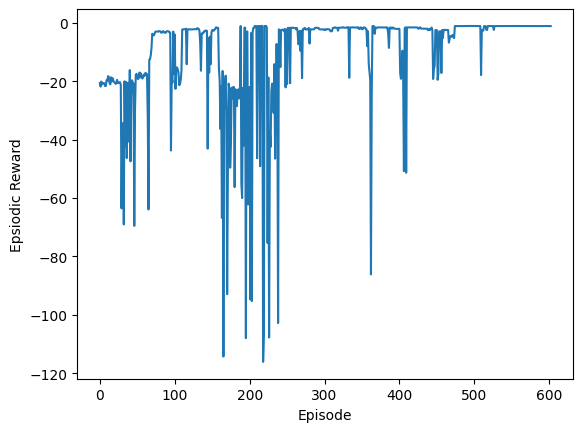

In [477]:
# import warnings
# alpha = random.uniform(alpha_low, alpha_high)
# fx = random.uniform(fx_low, fx_high)
# fy = random.uniform(fy_low, fy_high)
# l = random.uniform(l_low, l_high)
# lextension = random.uniform(lextension_low, lextension_high)
# lh = random.uniform(lh_low, lh_high)
# lr = random.uniform(lr_low, lr_high)
# lv = random.uniform(lv_low, lv_high)
# offset1 = random.uniform(offset1_low, offset1_high)        
# pr = random.uniform(pr_low, pr_high)
# pr2 = random.uniform(pr2_low, pr2_high)
# w = random.uniform(w_low, w_high)        
# wr = random.uniform(wr_low, wr_high)
# wu = random.uniform(wu_low, wu_high)  
total_episodes=100
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# os.environ['CUDA_VISIBLE_DEVICES'] = '2'

state = scaler_x1.transform([np.array([random.uniform(*bounds) for bounds in [
            (fx_low, fx_high), (fy_low, fy_high), 
            (l_low, l_high), (lextension_low, lextension_high), (lh_low, lh_high),
            (lr_low, lr_high), (lv_low, lv_high), (offset1_low, offset1_high), 
            (pr_low, pr_high), (pr2_low, pr2_high), (w_low, w_high), 
            (wr_low, wr_high), (wu_low, wu_high)]])]).reshape(-1,1)



# state = scaler_x1.transform([x_data1[508]]).reshape(-1,1)
# env = env_hfss(state)
# designs_fitness_scores = {}
start = datetime.now()
start_time = start.strftime("%H:%M:%S")
# print("Training the Agent.......")
for ep in range(total_episodes):
    print("Using GPU: ", tf.config.list_physical_devices('GPU'))
    # objectives_fitness_scores = {}
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time - New test episode is just started =", current_time)
    prev_state = env.reset()
    print("Reset state: {}".format(prev_state))
    episodic_reward = 0
    timestep_counter_episode = 0
    while True:
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        # print("Current Time - New step is just started =", current_time)
        timestep_counter += 1
        print("time step: ", timestep_counter)

        if timestep_counter_episode > max_timesteps_episode:
            print("The timesteps per episode reached the max.....")
            break
        timestep_counter_episode += 1
        learn_counter += 1
        target_update_counter += 1

        tf_prev_state = tf.expand_dims(tf.convert_to_tensor(np.squeeze([prev_state])), 0)
        # print("ou_noise: ", ou_noise())
        action = np.array(policy(tf_prev_state, ou_noise))
        # print("action: {}".format(action))
        state, reward, done = env.step(action)

        # print("prev_state: {}".format(prev_state))
        # print("action: {}".format(action))
        print("reward: {}".format(reward))
        # print("done: {}".format(done))
        print("state: {}".format(scaler_x1.inverse_transform(state)))
        if done == True and env.final_validation=='valid':
            designs_fitness_scores= env.get_scores()
#             print("designs_fitness_scores: {}".format((designs_fitness_scores)))
#             print("objectives_fitness_scores: {}".format((objectives_fitness_scores)))
            

        buffer.record(([prev_state], action, reward, [state]))
        episodic_reward += reward
        if timestep_counter > batch_size:
            if learn_counter % learn_freq == 0:
                buffer.learn()
                print("Learning process is done....")

            if target_update_counter % target_update_freq == 0:
                # update_target(target_actor.variables, actor_model.variables, tau)
                # update_target(target_critic.variables, critic_model.variables, tau)
                
                # Update target network weights directly
                target_actor.set_weights([tau * weight + (1 - tau) * target_weight 
                          for target_weight, weight in zip(target_actor.get_weights(), actor_model.get_weights())])

                target_critic.set_weights([tau * weight + (1 - tau) * target_weight 
                           for target_weight, weight in zip(target_critic.get_weights(), critic_model.get_weights())])

                print("Updating the target networks is done....")

        # End this episode when `done` is True
        if done:
            break
        prev_state = state

    ep_reward_list.append(episodic_reward)

    avg_reward = np.mean(ep_reward_list[-1:])
    print("Episode * {} * Reward is ==> {}".format(ep, avg_reward))
    avg_reward_list.append(avg_reward)
    print('designs_fitness_scores:', designs_fitness_scores)
    
end = datetime.now()
end_time = end.strftime("%H:%M:%S")
print("Starting Time =", start_time)
print("Ending Time =", end_time)

# Plotting graph
# Episodes versus Rewards
plt.plot(avg_reward_list)
plt.xlabel("Episode")
plt.ylabel("Epsiodic Reward")
# plt.savefig("EpisodicReward.svg")
plt.show()

In [141]:
# # Plotting graph
# # Episodes versus Rewards
# plt.plot(avg_reward_list)
# plt.xlabel("Episode")
# plt.ylabel("Epsiodic Reward")
# plt.savefig("EpisodicReward-500ep.svg")
# plt.show()

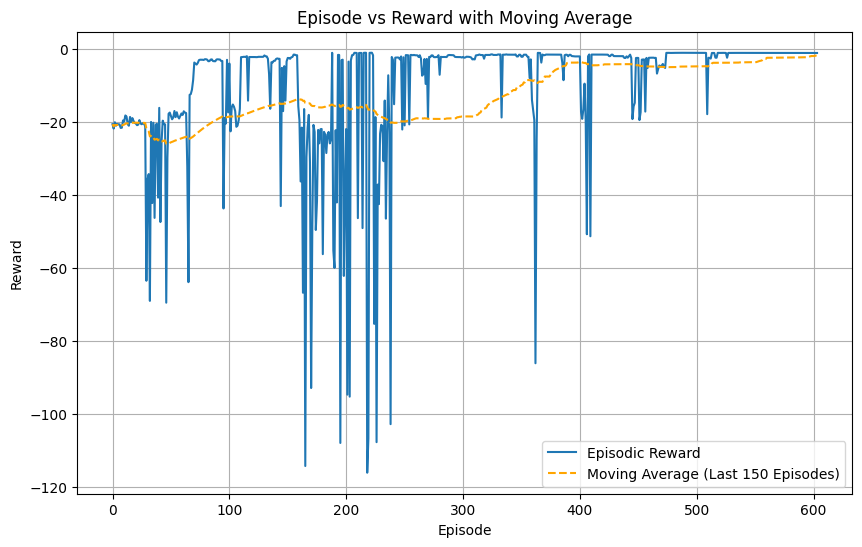

In [478]:
from collections import deque

# Initialize moving average deque
moving_avg_window = 150
moving_avg = deque(maxlen=moving_avg_window)

# Main reward processing loop (assume part of a larger loop)
ep_reward_list.append(episodic_reward)

# Compute average reward for this episode
avg_reward = np.mean(ep_reward_list[-1:])
# print("Episode * {} * Reward is ==> {}".format(ep, avg_reward))
avg_reward_list.append(avg_reward)

# Update moving average
moving_avg.append(avg_reward)
moving_avg_reward = np.mean(moving_avg)

# Debug outputs
# print("Moving Average Reward (Last 20 Episodes):", moving_avg_reward)
# print('designs_fitness_scores:', designs_fitness_scores)


# Plotting graph
plt.figure(figsize=(10, 6))
plt.plot(avg_reward_list, label="Episodic Reward")
plt.plot(
    range(len(avg_reward_list)),
    [np.mean(avg_reward_list[max(0, i - moving_avg_window):i + 1]) for i in range(len(avg_reward_list))],
    label=f"Moving Average (Last {moving_avg_window} Episodes)",
    linestyle="--",
    color="orange",
)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Episode vs Reward with Moving Average")
plt.legend()
plt.grid()
plt.savefig("EpisodicReward-600ep-limited.svg")
plt.show()

In [ ]:
# import logging
# from datetime import datetime
# import os
# import random
# import numpy as np
# import matplotlib.pyplot as plt

# # Set up logging
# log_file = f"training_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.log"
# logging.basicConfig(
#     filename=log_file,
#     filemode="w",
#     format="%(asctime)s - %(levelname)s - %(message)s",
#     level=logging.INFO,
# )
# logger = logging.getLogger()

# # Example logging messages
# logger.info("Starting the program...")
# logger.debug("Debug level is active.")

# # Suppress TensorFlow warnings
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# os.environ['CUDA_VISIBLE_DEVICES'] = '2'

# state = scaler_x1.transform([np.array([random.uniform(*bounds) for bounds in [
#     (alpha_low, alpha_high), (fx_low, fx_high), (fy_low, fy_high),
#     (l_low, l_high), (lextension_low, lextension_high), (lh_low, lh_high),
#     (lr_low, lr_high), (lv_low, lv_high), (offset1_low, offset1_high),
#     (pr_low, pr_high), (pr2_low, pr2_high), (w_low, w_high),
#     (wr_low, wr_high), (wu_low, wu_high)]])]).reshape(-1, 1)

# state = scaler_x1.transform([x_data1[508]]).reshape(-1, 1)
# env = env_hfss(state)

# start = datetime.now()
# start_time = start.strftime("%H:%M:%S")
# logger.info(f"Training the Agent... Start Time: {start_time}")

# designs_fitness_scores = {}
# for ep in range(total_episodes):
#     logger.info(f"Episode {ep} started using GPU: {tf.config.list_physical_devices('GPU')}")
#     now = datetime.now()
#     current_time = now.strftime("%H:%M:%S")
#     logger.info(f"Current Time - New test episode started: {current_time}")
    
#     prev_state = env.reset()
#     logger.info(f"Reset state: {prev_state}")
#     episodic_reward = 0
#     timestep_counter_episode = 0

#     while True:
#         now = datetime.now()
#         current_time = now.strftime("%H:%M:%S")
#         timestep_counter += 1
#         logger.debug(f"Time step: {timestep_counter}")

#         if timestep_counter_episode > max_timesteps_episode:
#             logger.info("The timesteps per episode reached the max.")
#             break

#         timestep_counter_episode += 1
#         learn_counter += 1
#         target_update_counter += 1

#         tf_prev_state = tf.expand_dims(tf.convert_to_tensor(np.squeeze([prev_state])), 0)
#         action = np.array(policy(tf_prev_state, ou_noise))
#         logger.debug(f"Action taken: {action}")
        
#         state, reward, done = env.step(action)
#         logger.info(f"Reward: {reward}")
#         logger.info(f"State: {scaler_x1.inverse_transform(state)}")

#         if done and env.final_validation == 'valid':
#             designs_fitness_scores = env.get_scores()
#             logger.info(f"Designs Fitness Scores: {designs_fitness_scores}")

#         buffer.record(([prev_state], action, reward, [state]))
#         episodic_reward += reward

#         if timestep_counter > batch_size:
#             if learn_counter % learn_freq == 0:
#                 buffer.learn()
#                 logger.info("Learning process completed.")

#             if target_update_counter % target_update_freq == 0:
#                 target_actor.set_weights([tau * weight + (1 - tau) * target_weight
#                     for target_weight, weight in zip(target_actor.get_weights(), actor_model.get_weights())])
#                 target_critic.set_weights([tau * weight + (1 - tau) * target_weight
#                     for target_weight, weight in zip(target_critic.get_weights(), critic_model.get_weights())])
#                 logger.info("Target networks updated.")

#         if done:
#             break

#         prev_state = state

#     ep_reward_list.append(episodic_reward)
#     avg_reward = np.mean(ep_reward_list[-1:])
#     logger.info(f"Episode {ep} - Reward: {avg_reward}")
#     avg_reward_list.append(avg_reward)
#     logger.info(f"Designs Fitness Scores: {designs_fitness_scores}")

# end = datetime.now()
# end_time = end.strftime("%H:%M:%S")
# logger.info(f"Training completed. Start Time: {start_time}, End Time: {end_time}")

# # Plotting graph
# plt.plot(avg_reward_list)
# plt.xlabel("Episode")
# plt.ylabel("Episodic Reward")
# plt.show()


In [492]:
designs_fitness_scores = env.get_scores()

In [495]:
top_3_designs = sorted(designs_fitness_scores, key=designs_fitness_scores.get, reverse=True)[:3]
top_3_scores = {design: designs_fitness_scores[design] for design in top_3_designs}
print("Top 3 designs with scores:", top_3_scores.values())


Top 3 designs with scores: dict_values([-0.31798190325933784, -0.31798885319388326, -0.3183502078868852])


In [503]:
print("Top 3 designs with scores:", top_3_scores)


Top 3 designs with scores: {(0.7490764976177171, 0.3422457464391194, -0.23648231145972975, 0.23301122605677393, 0.5067644021366162, 0.28039428950487133, -0.1443703179428037, 0.3093868294501958, -0.39387471137933067, -0.3775513606593572, -0.39031258704401217, 0.9785997784224603, 0.6154875754216516): -0.31798190325933784, (0.7490764976177171, 0.4670313657176588, -0.2719082401554789, 0.20652384667733015, 0.5067644021366162, 0.28039428950487133, -0.1443703179428037, 0.3093868294501958, -0.39387471137933067, -0.40900061383227904, -0.39031258704401217, 1.0989705822259719, 1.0854028587046236): -0.31798885319388326, (0.7490764976177171, 0.4670313657176588, -0.33998324985173844, 0.20385714479302408, 0.5067644021366162, 0.28039428950487133, -0.1443703179428037, 0.3093868294501958, -0.39387471137933067, -0.44739240482398185, -0.39031258704401217, 0.8862866530890049, 0.4655544072061198): -0.3183502078868852}


In [499]:
best_design = max(designs_fitness_scores, key=designs_fitness_scores.get)


In [500]:
best_design

(0.7490764976177171,
 0.3422457464391194,
 -0.23648231145972975,
 0.23301122605677393,
 0.5067644021366162,
 0.28039428950487133,
 -0.1443703179428037,
 0.3093868294501958,
 -0.39387471137933067,
 -0.3775513606593572,
 -0.39031258704401217,
 0.9785997784224603,
 0.6154875754216516)

In [501]:
designs_fitness_scores[best_design]

-0.31798190325933784

In [502]:
scaler_x1.inverse_transform([best_design])

array([[24.        ,  9.31436054, 57.88442661, 26.47986201, 53.        ,
         2.8       , 25.        , 36.        , -3.        , 23.81948211,
        68.        ,  6.70497556,  6.26864553]])

In [487]:
a = np.array([np.array(best_design)])
print(a)

[[ 0.7490765   0.34224575 -0.23648231  0.23301123  0.5067644   0.28039429
  -0.14437032  0.30938683 -0.39387471 -0.37755136 -0.39031259  0.97859978
   0.61548758]]


In [488]:
big_model(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


{1: array([[  2.44578313, -32.96530533,   0.05893935]]),
 2: array([[  1.90361446, -22.96375275,   0.03533282]]),
 3: array([], dtype=float64),
 4: array([[ 1.89156627e+00, -3.15306797e+01,  3.77488177e-02],
        [ 2.42168675e+00, -1.61167660e+01,  2.41327937e-02]])}

In [399]:
# class env_hfss:
#     def __init__(self, data):
#         self.center_frequency = intended_frequency
#         self.bandwidth = [0.034, 0.034]
#         self.s11 = -10
#         self.reward = 0
#         self.done = True               # target reached
#         self.designs_scores = {}
#         self.objectives_scores = {}
#         self.outputs = {}
        
#         self.alpha = data[0]
#         self.fx = data[1]
#         self.fy = data[2]
#         self.l = data[3]
#         self.lextension = data[4]
#         self.lh = data[5]
#         self.lr = data[6]
#         self.lv = data[7]
#         self.offset1 = data[8]
#         self.pr = data[9]
#         self.pr2 = data[10]
#         self.w = data[11]
#         self.wr = data[12]
#         self.wu = data[13]


#         # self.state = np.array([self.alpha, self.fx, self.fy, self.l, self.lextension,self.lh, 
#         #                        self.lr, self.lv, self.offset1, self.pr, self.pr2, self.w, self.wr, self.wu])

#         self.state = data
#         print("self.state: ", self.state)

#         #self.state_print = np.array([self._diameter, self._offset, self._substrate])

#         # State space boundaries for each dimension
#         self.state_low = lower_bound_state
#         self.state_high = upper_bound_state

#         # Action space boundaries
#         self.action_low = lower_bound_action
#         self.action_high = upper_bound_action

#     def step(self, action):
#         clipped_action = np.clip(np.squeeze(action), self.action_low, self.action_high)
#         # clipped_action = np.round(clipped_action, decimals=3)
#         new_state = np.squeeze(self.state) + np.squeeze(clipped_action)
#         # new_state = np.round(np.squeeze(self.state) + np.squeeze(clipped_action),4)

#         # Check if the state is within 3D bounds
#         if not self._is_valid_state(new_state):
#             new_state = np.clip(new_state, self.state_low, self.state_high)

#         if np.array_equal(new_state, self.state):
# #             self.reward = -10
#             self.reward = -5
#             self.done = False
#             return self.state, self.reward, self.done
#         else:
#             self.state = np.squeeze(new_state)

#             # print("self.state: ",self.state)
            
#             self.outputs = big_model(self.state)
            
#             # print("self.outputs: ", self.outputs)
            
#             self.reward, self.done = self._check_objective()
#             return self.state, self.reward, self.done
    

                

#     def _is_valid_state(self, stat):
#         return np.all(self.state_low <= stat) and np.all(stat <= self.state_high)

    
# #     def _check_objective(self):
# #         if math.isclose(self.center_frequency, intended_frequency, rel_tol= relative_frequency_tolerance):
# #             if self.s11 <= -15:
# #                 self.reward = max_reward
# #                 self.done = True
# #             else:
# # #                 self.reward = -(self.s11+15)/5
# #                 self.reward = -1
# #                 self.done = False
# #         else:
# #             self.reward = -1
# # #             self.reward = -pow(20*abs(self.center_frequency-intended_frequency), 2) - 2.5644
# #             self.done = False
# #         return self.reward, self.done
    
    
    
#     def _check_objective(self):
#         reward_min = -0.4 
#         # Right band
#         right_band_check =  len(self.outputs[1])==3
        
#         # Left band
#         left_band_check =   len(self.outputs[2])==3
        
#         # None band
#         none_band_check =   len(self.outputs[3])==0

#         # Dual band
#         dual_band_check =   len(self.outputs[4])==6
        
        
#         # Right band
#         if right_band_check:
#             if math.isclose(self.outputs[1][0], intended_frequency[1], rel_tol= relative_frequency_tolerance):
#                 self.s11 = self.outputs[1][1]
#                 self.bandwidth = self.outputs[1][2]
#                 fitness_score_right = self.scores()
#             else:
#                 print("Right band is not in range.")
#                 fitness_score_right = 0
                
#         else:
#             print("Right band does not fit.")
#             fitness_score_right = 0

        
#         # Left band
#         if left_band_check:
#             if math.isclose(self.outputs[2][0], intended_frequency[0], rel_tol= relative_frequency_tolerance):
#                 self.s11 = self.outputs[2][1]
#                 self.bandwidth = self.outputs[2][2]
#                 fitness_score_left = self.scores()
#             else:
#                 print("Left band is not in range.")
#                 fitness_score_left = 0
#         else:
#             print("Left band does not fit.")
#             fitness_score_left = 0


        
#         # None band
#         if none_band_check:
#             self.s11 = 0
#             self.bandwidth = 0
#             fitness_score_none = 1
#         else:
#             print("None band does not fit.")
#             fitness_score_none = 0


#         # Dual band
#         if dual_band_check:
#             if math.isclose(self.outputs[4][0], intended_frequency[0], rel_tol= relative_frequency_tolerance) & math.isclose(self.outputs[4][3], intended_frequency[1], rel_tol= relative_frequency_tolerance):   
                
#                 self.s11 = self.outputs[4][1]
#                 self.bandwidth = self.outputs[4][2]
#                 fitness_score_daul1 = self.scores()
    
#                 self.s11 = self.outputs[4][4]
#                 self.bandwidth = self.outputs[4][5]
#                 fitness_score_daul2 = self.scores()
#             else:
#                 print("Dual band is not in range.")
#                 fitness_score_daul1 = 0
#                 fitness_score_daul2 = 0
#         else:
#             print("Dual band does not fit.")
#             fitness_score_daul1 = 0
#             fitness_score_daul2 = 0


            
#         self.reward = (fitness_score_right+fitness_score_left+fitness_score_none+fitness_score_daul1+fitness_score_daul2)/5 - 1
        
#         self.done = True if self.reward > reward_min else False
#         if self.reward > reward_min:
#             self.designs_scores[tuple(self.state)] = self.reward
#         # self.designs_scores[tuple(self.state)] = fitness_score if self.reward > reward_min else continue
        
#         # self.reward = -pow(20*abs(self.center_frequency-intended_frequency), 2) - 2.5644
    
#         return self.reward, self.done

#     def get_score(self):
#         return self.designs_scores
    
#     def scores(self):
#         s11_min = -30
#         s11_max = 0
#         bandwidth_min = 0
#         bandwidth_max = 0.05 # GHz
#         weights = [0.5, 0.5]        
#         normalized_s11 = (s11_max - self.s11) / (s11_max - s11_min)
#         normalized_bandwidth = (self.bandwidth - bandwidth_min) / (bandwidth_max - bandwidth_min)
#         fitness_score = weights[0] * normalized_s11 + weights[1] * normalized_bandwidth
        
#         # self.designs_scores[tuple(self.state_real)] = fitness_score
#         # self.objectives_scores[tuple(np.array([self.s11, self.gain, self.bandwidth]))] = fitness_score  
        
#         return fitness_score
    
#     def reset(self):
#         self.alpha = random.uniform(alpha_low, alpha_high)
#         self.fx = random.uniform(fx_low, fx_high)
#         self.fy = random.uniform(fy_low, fy_high)
#         self.l = random.uniform(l_low, l_high)
#         self.lextension = random.uniform(lextension_low, lextension_high)
#         self.lh = random.uniform(lh_low, lh_high)
#         self.lr = random.uniform(lr_low, lr_high)
#         self.lv = random.uniform(lv_low, lv_high)
#         self.offset1 = random.uniform(offset1_low, offset1_high)        
#         self.pr = random.uniform(pr_low, pr_high)
#         self.pr2 = random.uniform(pr2_low, pr2_high)
#         self.w = random.uniform(w_low, w_high)        
#         self.wr = random.uniform(wr_low, wr_high)
#         self.wu = random.uniform(wu_low, wu_high)  
        
        

#         self.state = np.array([self.alpha, self.fx, self.fy, self.l, self.lextension, self.lh, self.lr, self.lv, self.offset1, self.pr,
#                               self.pr2, self.w, self.wr, self.wu])
#         return self.state

In [370]:
state1 = scaler_x1.transform([0.998*x_data1[508]]).reshape(-1,1)
env_test = env_hfss(state1)

Initial state:  [[-0.08011137]
 [ 0.02744725]
 [ 0.19633504]
 [-0.04356378]
 [-0.06501528]
 [ 0.02894801]
 [ 0.00900521]
 [ 0.13544766]
 [ 0.16432861]
 [-0.22667576]
 [ 0.10332176]
 [-0.27270791]
 [ 0.10657895]
 [ 1.12952959]]


In [371]:
action = np.array([0.001 for i in range(len(x_data1[508]))]).reshape(1,-1)
print(action)

[[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
  0.001 0.001]]


In [372]:
env_test.step(action)

new_state: [-0.079  0.028  0.197 -0.043 -0.064  0.03   0.01   0.136  0.165 -0.226
  0.104 -0.272  0.108  1.131]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


(array([[-0.079,  0.028,  0.197, -0.043, -0.064,  0.03 ,  0.01 ,  0.136,
          0.165, -0.226,  0.104, -0.272,  0.108,  1.131]]),
 -0.31981402124999025,
 True)